In [16]:
from utils.binaries import *
from utils.plotting import *
from utils.auger.sd.histo import SdHisto, read_histos
from utils.auger.sd.moni import Monit

In [17]:
peak_histos_before = read_histos('/cr/data01/filip/Data/muonAcquisitionIII/peak.txt')

In [18]:
mips_before = {
    943: {},
    944: {},
    949: {},
    954: {},
}

# mips_after = {
#     943: {},
#     944: {},
#     949: {},
#     954: {},
# }

for event in peak_histos_before:
    try:
        if event['timestamp'] < 1737730078: raise KeyError
        histo = SdHisto(peak=event['data'], pmt_mask=[0,0,0,1])
        mips_before[event['id']][event['timestamp']] = histo.get_peak('peak')[-1][1]
    except KeyError: continue 

# for event in peak_histos_after:
#     try:
#         histo = SdHisto(peak=event['data'], pmt_mask=[0,0,0,1])
#         mips_after[event['id']][event['timestamp']] = histo.get_peak('peak')[-1][1]
#     except KeyError: continue

SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence


SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence
SSD SdHisto fit failed: attempt to get argmax of an empty sequence


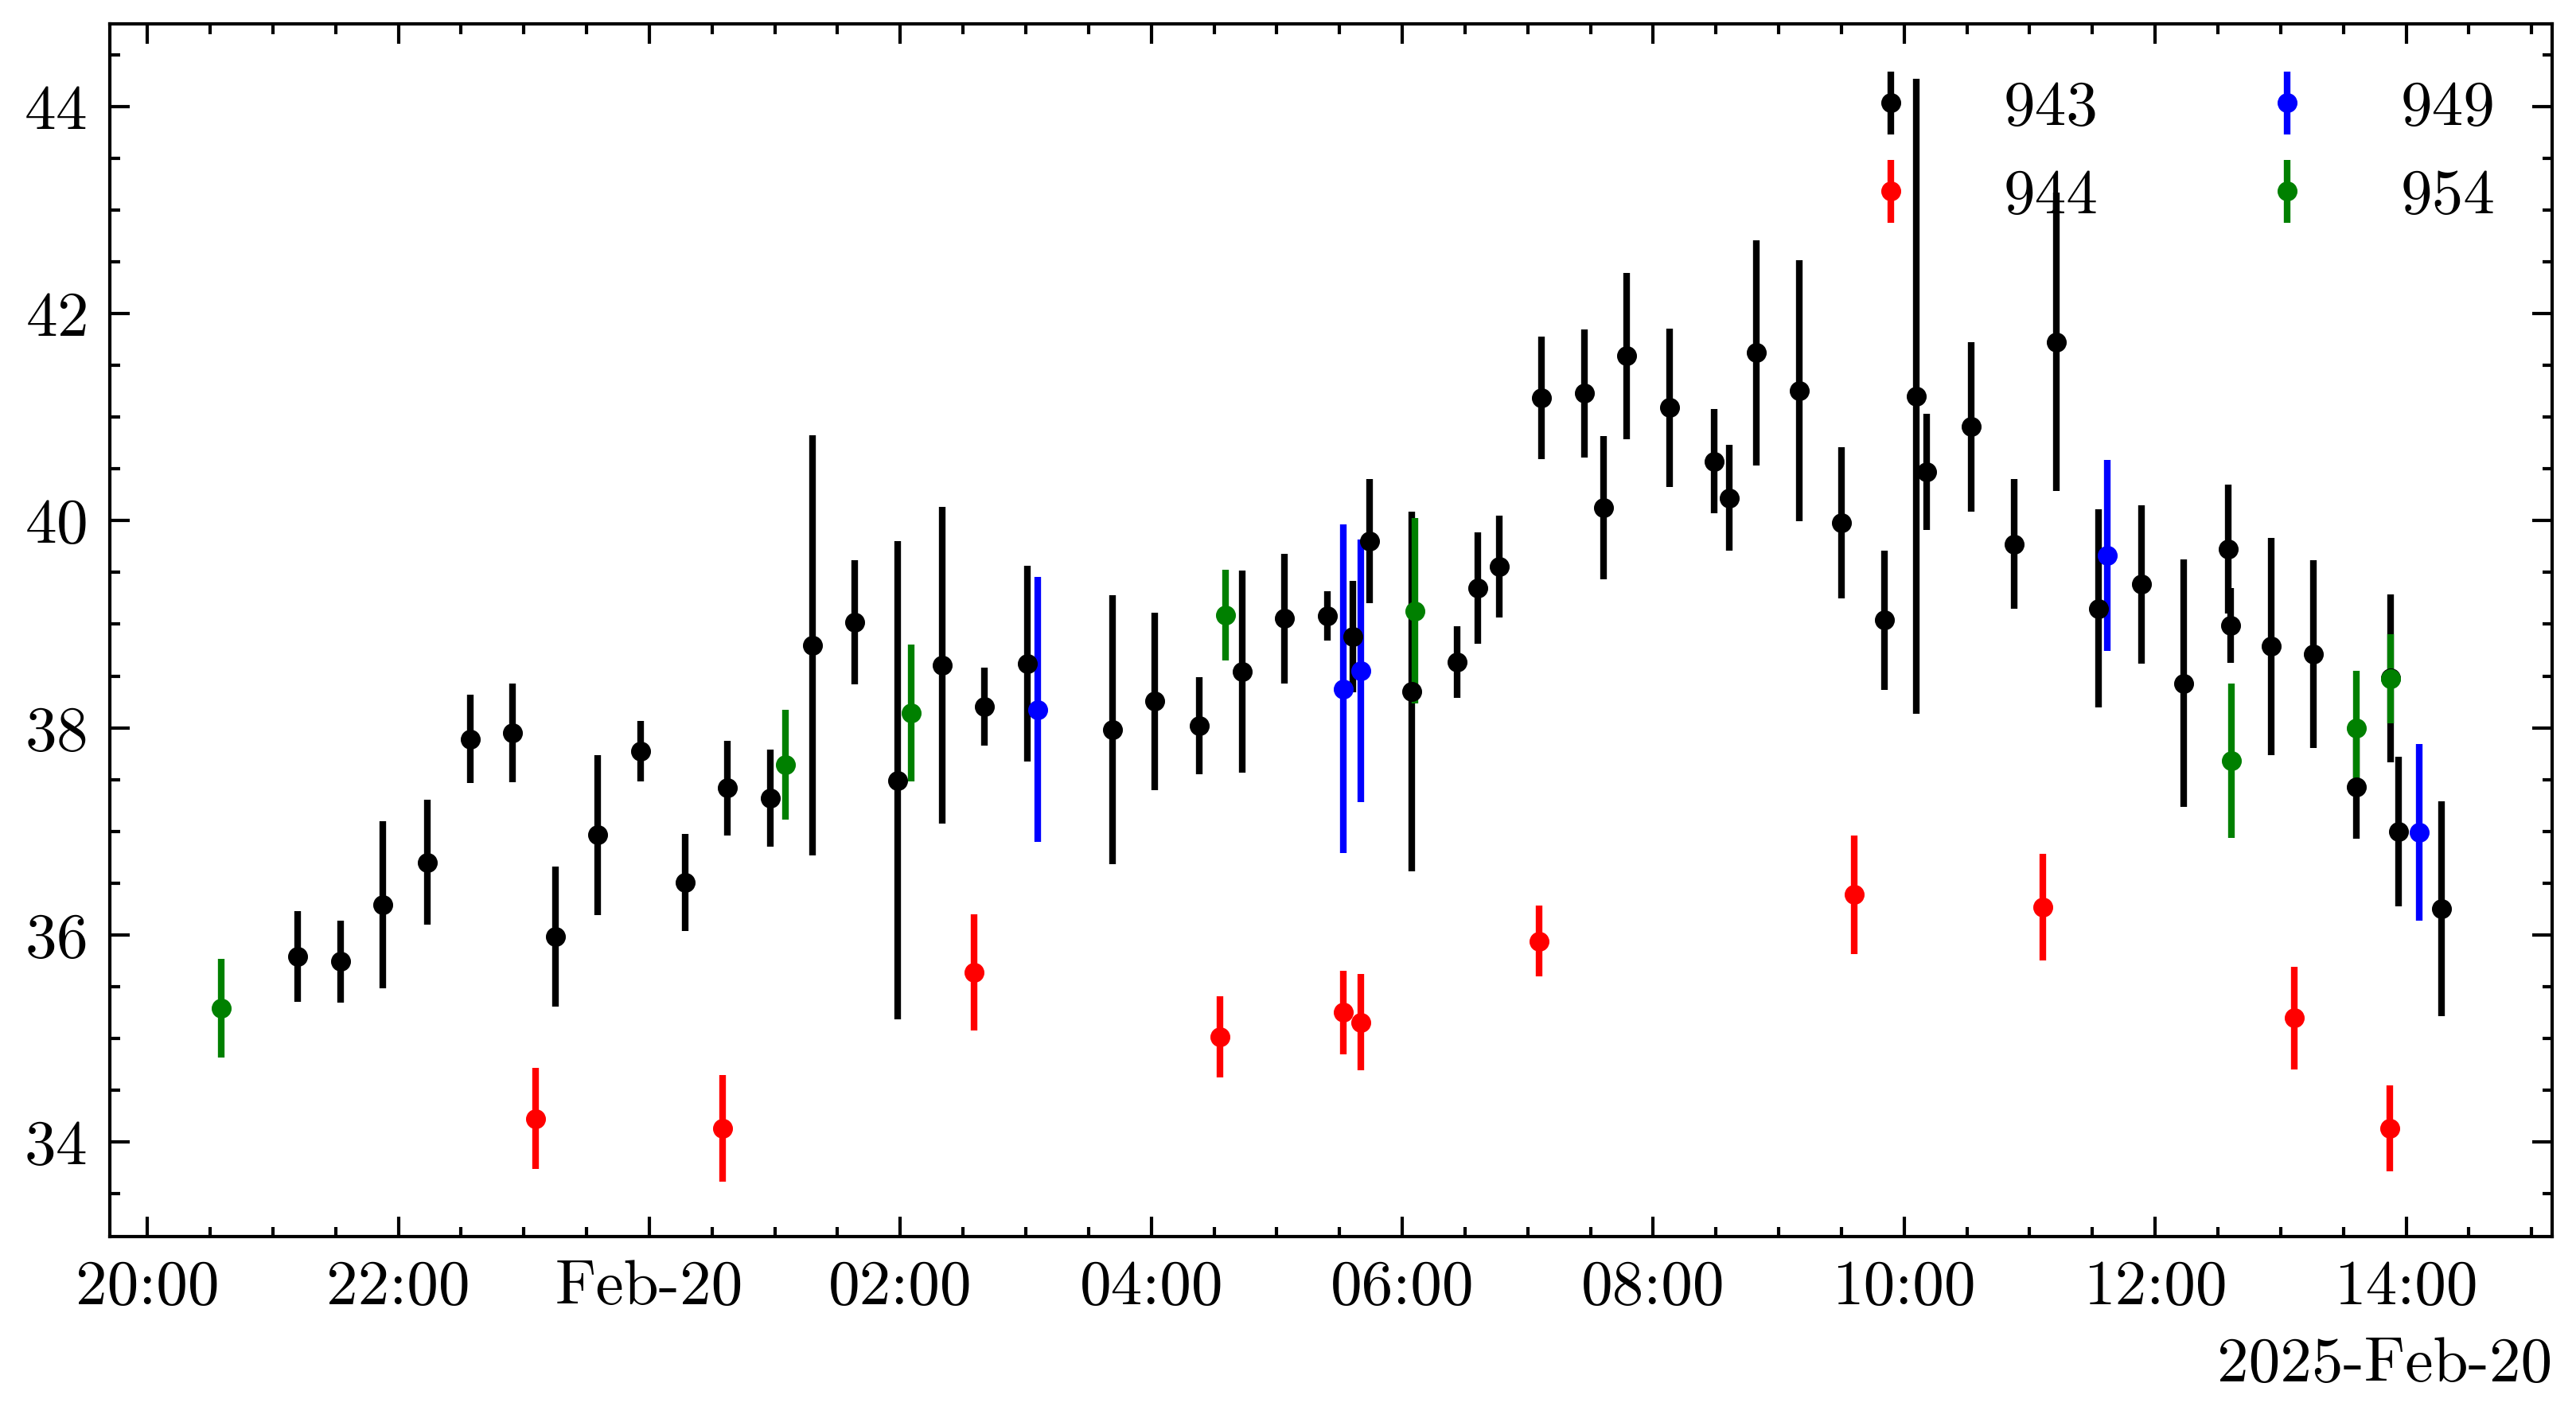

In [19]:
mip = {}
for station in [943, 944, 949, 954]:

        # t_moni = monit('fTime', station)
        # mip = monit('fPeak', station)[:, -1]

        t = list(mips_before[station].keys())
        y = [x.n for x in mips_before[station].values()]
        s = [x.std_dev for x in mips_before[station].values()]

        # t += list(mips_after[station].keys())
        # y += [x.n for x in mips_after[station].values()]
        # s += [x.std_dev for x in mips_after[station].values()]
        mip[station] = uncertainties.ufloat(np.mean(y), np.sqrt(np.sum(np.array(s)**2))/len(s))

        plt.errorbar(plot.to_datetime(t), y, s, label=station, marker='o', ls='none')
        # plt.plot(plot.to_datetime(t_moni), mip, marker='none')

plt.legend(ncol=2)
plot.apply_datetime_format(plt.gca())

In [20]:
tools.pickle_save("/cr/data01/filip/Data/muonAcquisitionIII/mip_peak.pkl", mip)

In [10]:
monit = Monit("/cr/data01/filip/Data/muonAcquisitionIII/mc_2025_02_19_20h14.root", 
              "/cr/data01/filip/Data/muonAcquisitionIII/mc_2025_02_20_00h01.root")

16:33:04 (  +24.9s) [INFO   ] -- received 2 file(s) as input
16:33:05 (  +595ms) [INFO   ] -- View monit keys with self.keys()


In [13]:
monit("f70HzRate", 949)

16:35:50 (  +74.0s) [INFO   ] -- found 164 entries for key f70HzRate and station #949


array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [69.  , 52.63, 70.9 ],
       [69.  , 49.54, 69.  ],
       [69.32, 53.78, 70.32],
       [67.81, 51.63, 73.36],
       [69.95, 53.65, 70.82],
       [71.29, 54.67, 71.36],
       [70.98, 53.77, 70.62],
       [69.9 , 50.59, 70.29],
       [69.18, 51.93, 70.78],
       [69.81, 54.47, 69.7 ],
       [70.52, 56.03, 69.57],
       [69.19, 48.39, 68.44],
       [69.77, 45.52, 70.59],
       [68.24, 45.26, 69.36],
       [68.72, 48.77, 66.67],
       [69.75, 52.68, 68.77],
       [68.44, 52.96, 68.88],
       [71.29, 51.88, 71.54],
       [69.57, 48.44, 69.65],
       [71.24, 55.4 , 71.72],
       [71.22, 45.04, 70.72],
       [71.24, 52.01, 69.49],
       [69.72, 36.26, 69.85],
       [69.62, 44.65, 69.06],
       [72.54, 46.63, 72.32],
       [70.6 , 49.65, 70.21],
       [70.13, 50.85, 69.13],
       [69.9 , 51.62, 68.98],
       [72.75, 49.13, 73.11],
       [69.24, 52.42, 67.49],
       [70.81, 31.37, 71.49],
       [70